In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
!pip install shap
import shap

In [2]:
data = pd.read_csv("C:/Users/abhi5/OneDrive/Desktop/data.csv") 

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Displaying the descriptive statistics for each feature in the dataset
desc_stats_per_feature = data.describe().T  # Transpose for better readability
desc_stats_per_feature

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.287589,0.703802,3.56100,5.885500,6.20900,6.629750,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


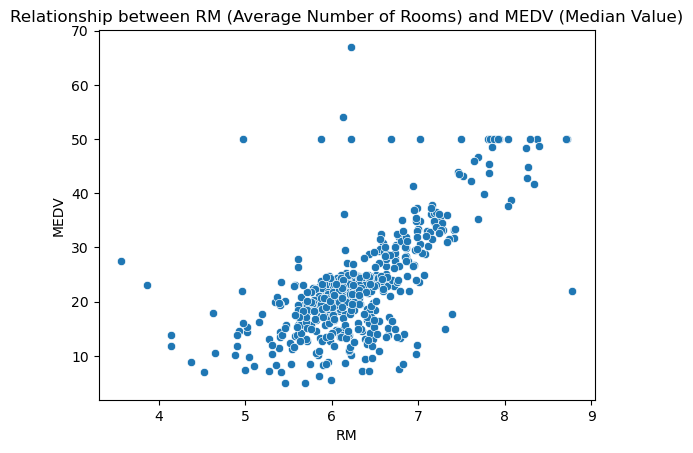

In [5]:
# Scatter plot for RM vs MEDV
sns.scatterplot(data=data, x='RM', y='MEDV')
plt.title('Relationship between RM (Average Number of Rooms) and MEDV (Median Value)')
plt.show()

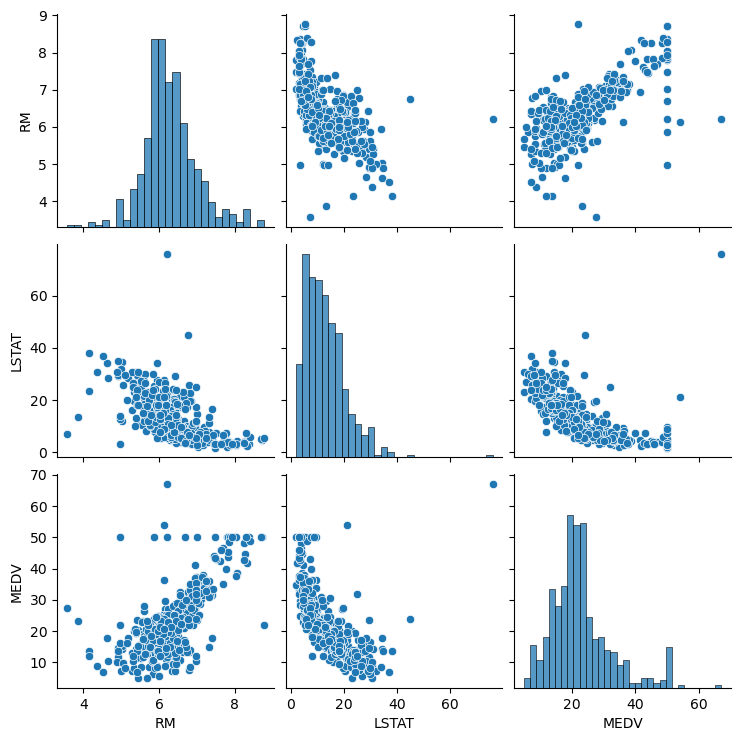

In [6]:
# Pair plot for RM, LSTAT, and MEDV
sns.pairplot(data[['RM', 'LSTAT', 'MEDV']])
plt.show()

In [7]:
# Identifying Outliers using the Interquartile Range (IQR) method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

outliers

CRIM       67
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          76
LSTAT       8
MEDV       42
dtype: int64

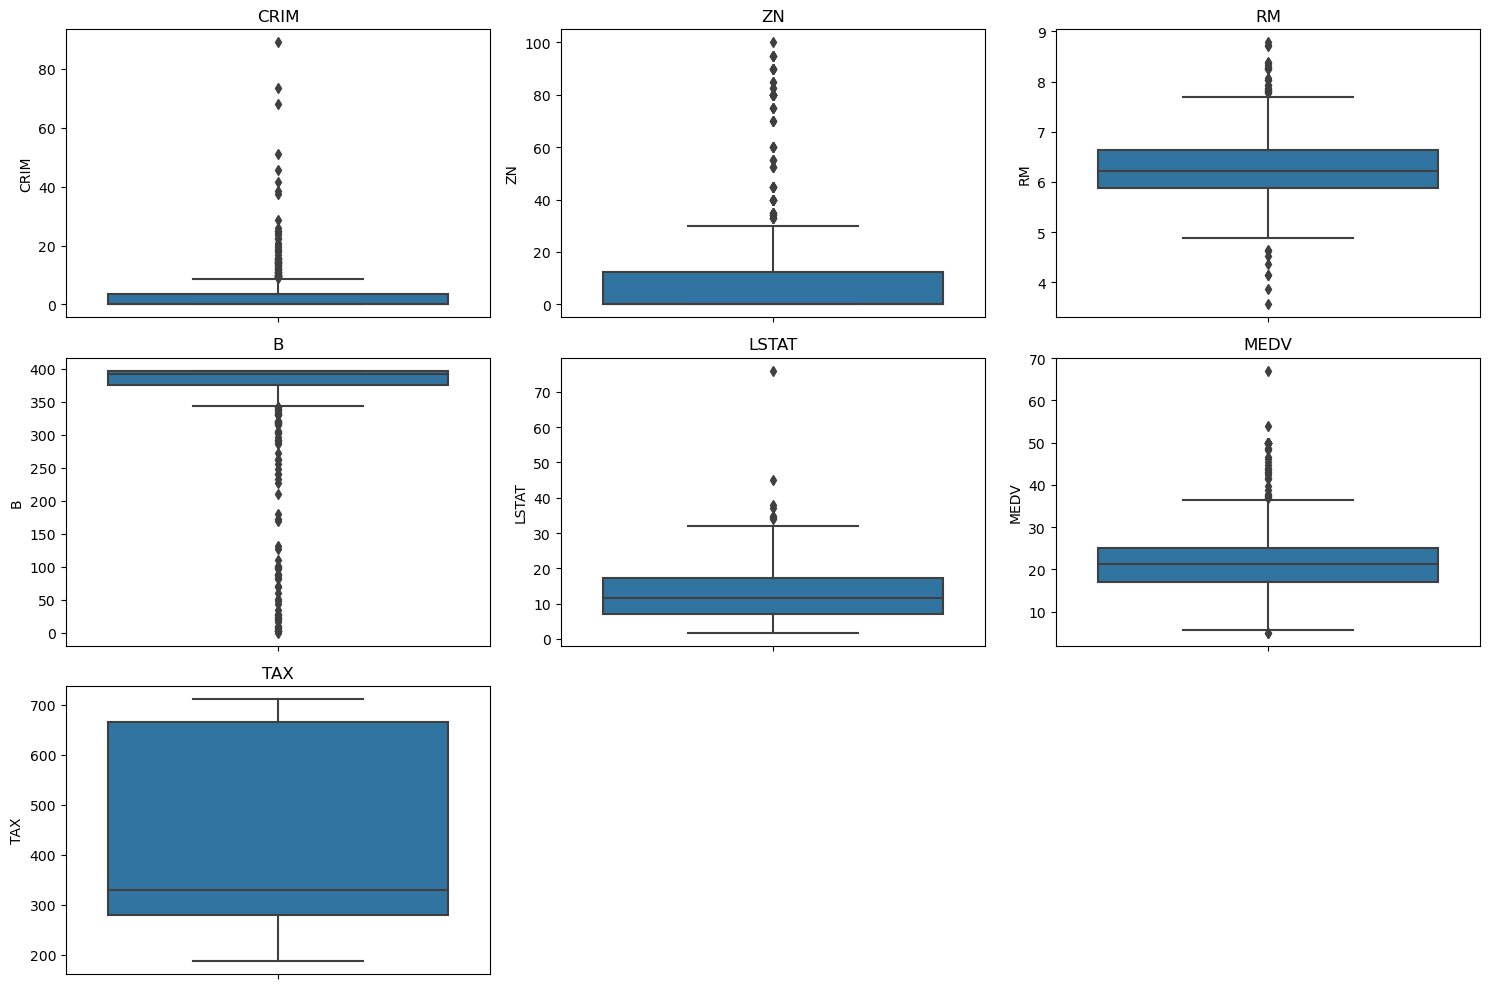

In [8]:
# Visualizing outliers using box plots for a subset of features
# Selecting a few columns for visualization due to space constraints
columns_to_visualize = ['CRIM', 'ZN', 'RM', 'B', 'LSTAT', 'MEDV', 'TAX']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

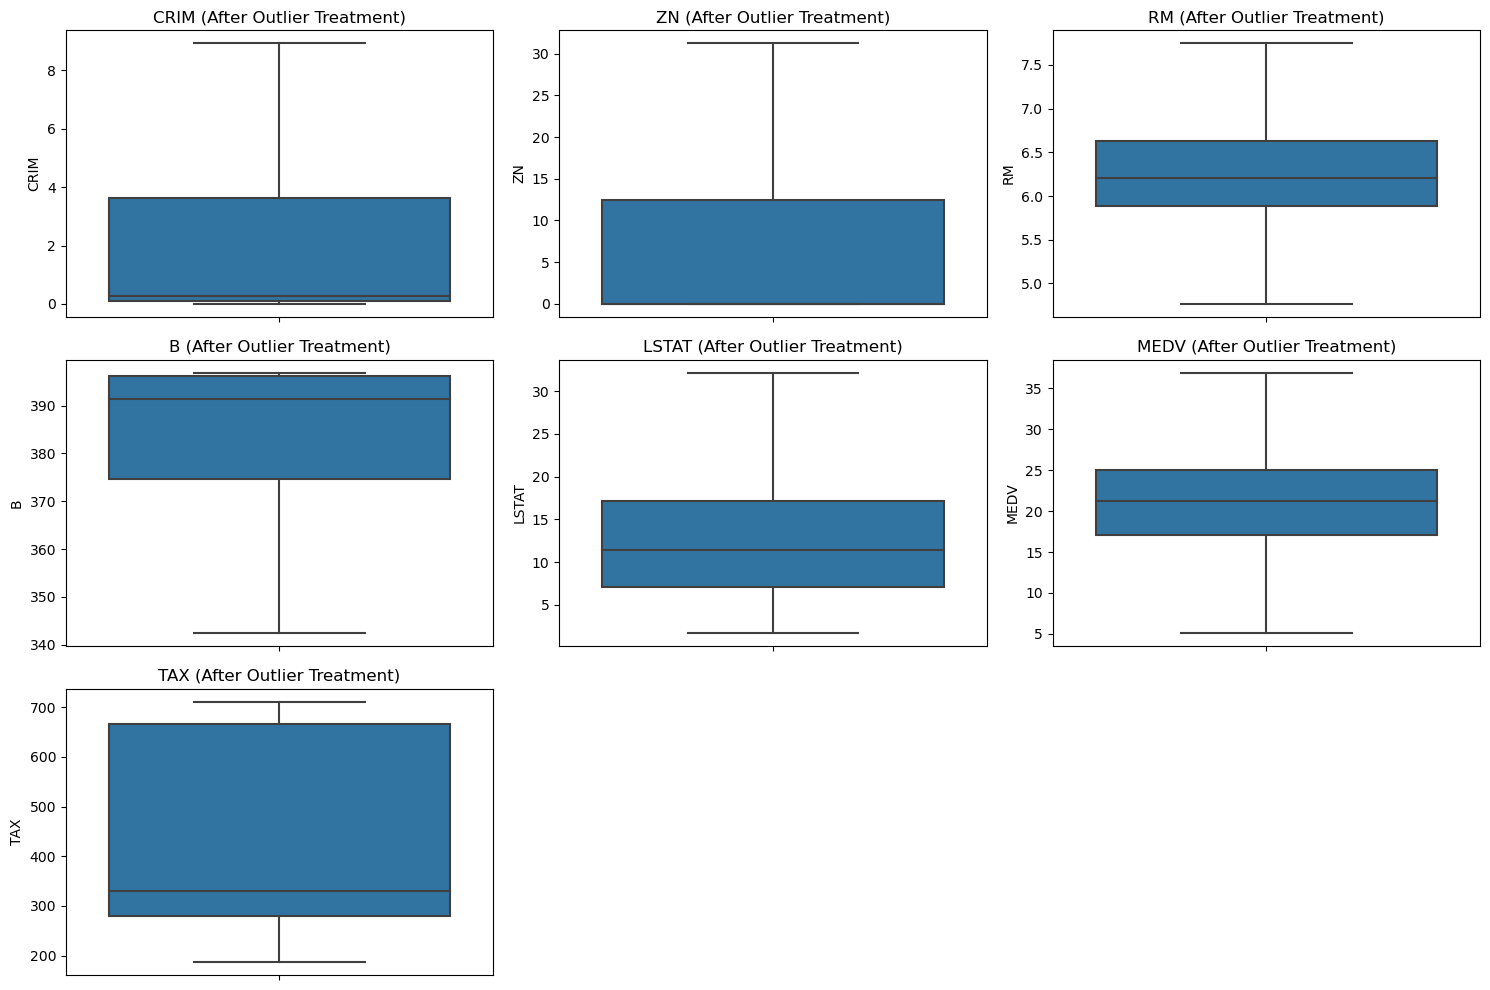

In [9]:
# Treating outliers using the IQR method
# We will cap the outliers to the 1.5*IQR range instead of removing them to preserve data integrity

for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Verifying the treatment of outliers by visualizing the same subset of features
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col + ' (After Outlier Treatment)')

plt.tight_layout()
plt.show()

In [10]:
# Checking for missing values again
missing_values = data.isnull().sum()
missing_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# Handling missing values in the 'RM' column
# Using mean imputation as a simple and effective method

# Calculating the mean of the 'RM' column
rm_mean = data['RM'].mean()

# Filling missing values in 'RM' with the calculated mean
data['RM'].fillna(rm_mean, inplace=True)

# Checking if the missing values have been successfully filled
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
# Calculating the correlation matrix for the dataset
correlation_matrix = data.corr()

correlation_matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.367435,0.628996,NaN,0.664063,-0.261422,0.516721,-0.552649,0.928276,0.872415,0.397362,-0.425356,0.571808,-0.536383
ZN,-0.367435,1.000000,-0.584199,NaN,-0.549070,0.349283,-0.581206,0.681866,-0.338281,-0.380052,-0.434262,0.241610,-0.447985,0.418111
INDUS,0.628996,-0.584199,1.000000,NaN,0.763583,-0.406389,0.642817,-0.713507,0.591784,0.718764,0.378480,-0.414957,0.599801,-0.553295
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.664063,-0.549070,0.763583,NaN,1.000000,-0.320617,0.729233,-0.775826,0.609343,0.666982,0.187221,-0.422644,0.584856,-0.500706
RM,-0.261422,0.349283,-0.406389,NaN,-0.320617,1.000000,-0.254300,0.217001,-0.209502,-0.294302,-0.335247,0.188807,-0.614440,0.686924
AGE,0.516721,-0.581206,0.642817,NaN,0.729233,-0.254300,1.000000,-0.751070,0.452229,0.503360,0.259984,-0.302262,0.589252,-0.454357
DIS,-0.552649,0.681866,-0.713507,NaN,-0.775826,0.217001,-0.751070,1.000000,-0.494517,-0.537041,-0.245169,0.314598,-0.500452,0.326581
RAD,0.928276,-0.338281,0.591784,NaN,0.609343,-0.209502,0.452229,-0.494517,1.000000,0.910211,0.440291,-0.377369,0.466303,-0.452868
TAX,0.872415,-0.380052,0.718764,NaN,0.666982,-0.294302,0.503360,-0.537041,0.910211,1.000000,0.442538,-0.421450,0.527063,-0.541186


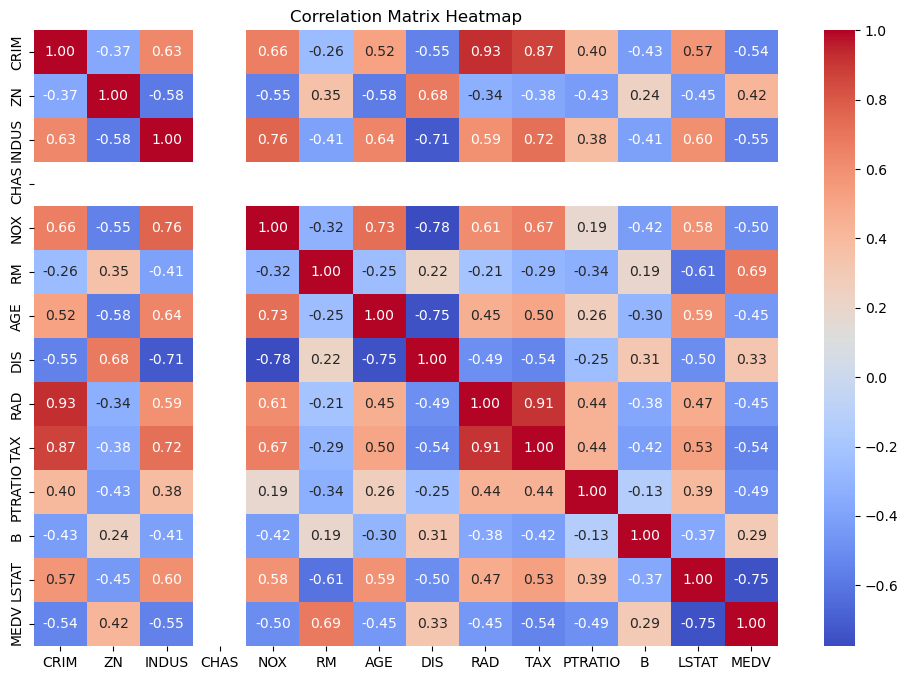

In [13]:
# Plotting the correlation matrix using a heatmap for better visualization

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Splitting the dataset into training and test sets (80% train, 20% test)

X = data.drop('MEDV', axis=1)  # Features
y = data['MEDV']               # Target

# Performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the resulting datasets
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape

((408, 13), (103, 13), (408,), (103,))

In [15]:
# Checking for Normality by calculating skewness for each feature
feature_skewness = data.skew()

# Checking Scale Variance by looking at the range (min and max) of each feature
feature_range = data.max() - data.min()

# Creating a DataFrame for a clearer presentation
normality_and_scale_check = pd.DataFrame({
    'Skewness': feature_skewness,
    'Range': feature_range
})

normality_and_scale_check

,Skewness,Range
CRIM,1.286628,8.923130
ZN,1.276486,31.250000
INDUS,0.290051,27.280000
CHAS,0.000000,0.000000
NOX,0.731239,0.486000
RM,0.295955,2.977000
AGE,-0.601268,97.100000
DIS,0.910726,8.514875
RAD,1.019393,23.000000
TAX,0.684024,524.000000


In [16]:
# Applying PowerTransformer to reduce skewness in the dataset
# PowerTransformer applies a Box-Cox transform to positive data and Yeo-Johnson to both positive and negative data
pt = PowerTransformer()
data_transformed = pt.fit_transform(data)

# Converting the transformed data back to a DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=data.columns)

# Recalculating skewness to verify the changes
new_skewness = data_transformed.skew()

# Creating a DataFrame to compare the original and new skewness values
skewness_comparison = pd.DataFrame({'Original Skewness': feature_skewness, 'New Skewness': new_skewness})
skewness_comparison

,Original Skewness,New Skewness
CRIM,1.286628,0.540921
ZN,1.276486,1.084985
INDUS,0.290051,-0.106942
CHAS,0.000000,0.000000
NOX,0.731239,0.095221
RM,0.295955,-0.000163
AGE,-0.601268,-0.417799
DIS,0.910726,0.066542
RAD,1.019393,0.067218
TAX,0.684024,0.080155


In [17]:
# Creating new features in the transformed dataset

# Interaction term between TAX and RAD
data_transformed['TAX_RAD_Interaction'] = data_transformed['TAX'] * data_transformed['RAD']

# Polynomial features (squared terms)
data_transformed['CRIM_Squared'] = data_transformed['CRIM'] ** 2
data_transformed['LSTAT_Squared'] = data_transformed['LSTAT'] ** 2

# Verifying the new features
new_features_check = data_transformed[['TAX_RAD_Interaction', 'CRIM_Squared', 'LSTAT_Squared']].head()
new_features_check

,TAX_RAD_Interaction,CRIM_Squared,LSTAT_Squared
0,1.288773,1.186871,1.596492
1,1.706464,1.057041,0.122173
2,1.706464,1.057158,2.387946
3,1.324325,1.027635,3.721246
4,1.324325,0.834420,1.366628


In [18]:
# Initialize the Linear Regression model
model = LinearRegression()

# Prepare the features (X) and target (y) for training
X = data_transformed.drop('MEDV', axis=1)
y = data_transformed['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics: MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2

(0.33220056713040214, 0.5763684300257971, 0.6737224932990038)

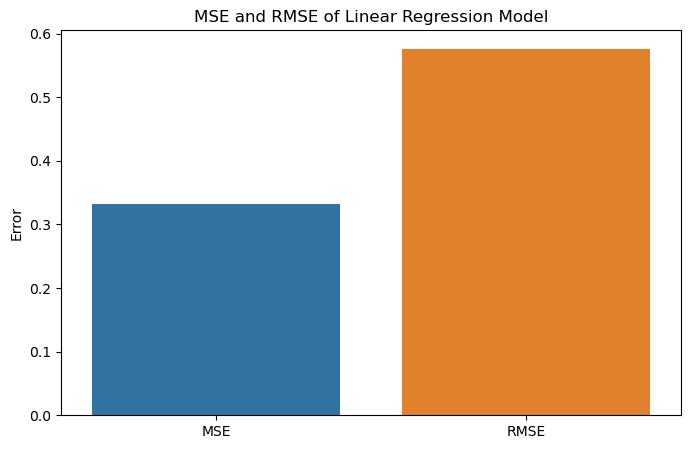

In [35]:
# Data for plotting
metrics = ['MSE', 'RMSE']
values = [mse, rmse]

# Plotting the bar chart for MSE and RMSE
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values)
plt.title('MSE and RMSE of Linear Regression Model')
plt.ylabel('Error')
plt.show()

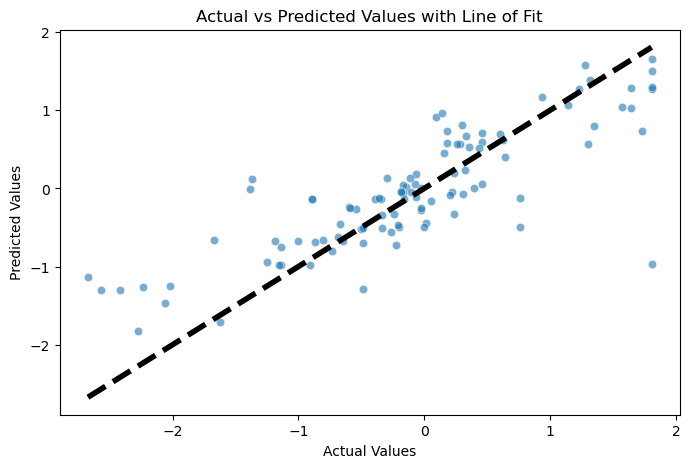

In [36]:
# Scatter plot of actual vs predicted values with a line of perfect fit
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Line of Fit')
plt.show()

In [20]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating evaluation metrics: MSE, RMSE, and R-squared for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, rmse_rf, r2_rf

(0.239665353391081, 0.48955628214851965, 0.7646078252588913)

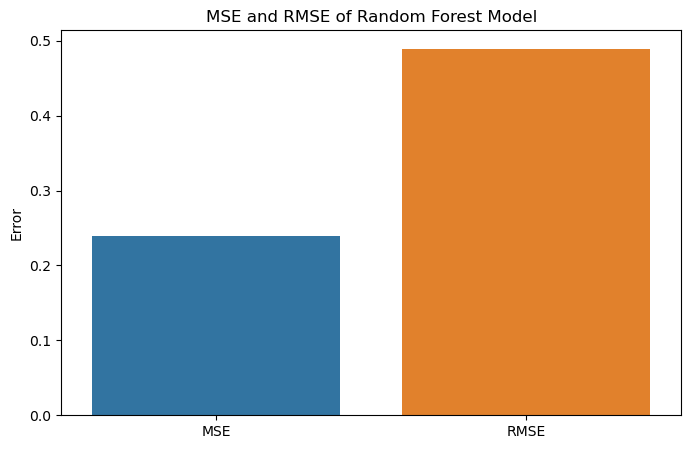

In [37]:
# Data for plotting
rf_metrics = ['MSE', 'RMSE']
rf_values = [mse_rf, rmse_rf]

# Plotting the bar chart for MSE and RMSE for the Random Forest model
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_metrics, y=rf_values)
plt.title('MSE and RMSE of Random Forest Model')
plt.ylabel('Error')
plt.show()

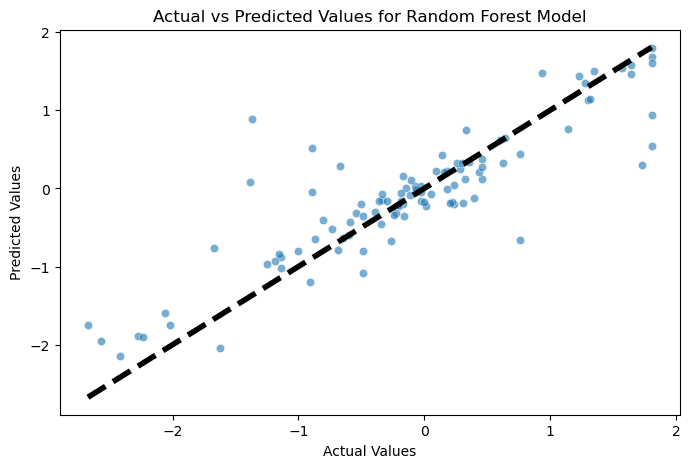

In [38]:
# Scatter plot of actual vs predicted values for Random Forest model with a line of perfect fit
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Model')
plt.show()

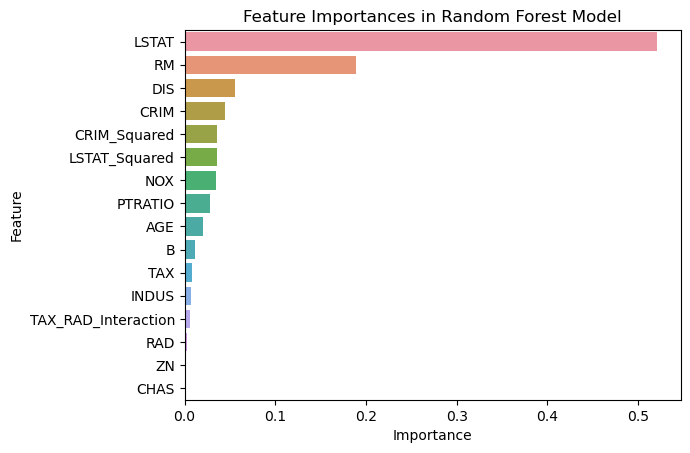

In [22]:
feature_names = X_train.columns  # X_train is the training data used for the model

# Extracting feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to display the feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [23]:
# Initialize and train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions and calculating evaluation metrics for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, rmse_gb, r2_gb

(0.2536405814587056, 0.5036274232592042, 0.7508817723238509)

In [24]:
# Linear Regression hyperparameter space
lr_param_dist = {
    'fit_intercept': [True, False],
    # If you have more hyperparameters, add them here
}

# Initialize the RandomizedSearchCV object for Linear Regression
random_search_lr = RandomizedSearchCV(estimator=LinearRegression(), 
                                      param_distributions=lr_param_dist, 
                                      n_iter=10,  # Number of parameter settings sampled
                                      cv=5, 
                                      scoring='neg_mean_squared_error', 
                                      random_state=42)

# Perform the random search
random_search_lr.fit(X_train, y_train)

# Best parameters and score for Linear Regression
lr_best_params = random_search_lr.best_params_
lr_best_score = -random_search_lr.best_score_
lr_best_params, lr_best_score

The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.


({'fit_intercept': True}, 0.24573330131514687)

In [25]:
# Random Forest hyperparameter space
rf_param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # You can add more hyperparameters here if needed
}

# Initialize the RandomizedSearchCV object for Random Forest
random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                      param_distributions=rf_param_dist, 
                                      n_iter=20,  # Number of parameter settings that are sampled
                                      cv=5, 
                                      scoring='neg_mean_squared_error', 
                                      verbose=1, 
                                      random_state=42,
                                      n_jobs=-1)  # n_jobs=-1 will use all available CPU cores

# Perform the random search
random_search_rf.fit(X_train, y_train)

# Best parameters and score for Random Forest
rf_best_params = random_search_rf.best_params_
rf_best_score = -random_search_rf.best_score_
rf_best_params, rf_best_score

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_depth': 20},
 0.14663307347946936)

In [26]:
# Hyperparameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
}

In [27]:
# Randomized search
random_search_gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                                      gb_param_grid, 
                                      n_iter=10, 
                                      scoring='neg_mean_squared_error', 
                                      cv=5, 
                                      random_state=42)

random_search_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [28]:
# Best parameters and score
gb_best_params = random_search_gb.best_params_
gb_best_score = -random_search_gb.best_score_
gb_best_params, gb_best_score

({'n_estimators': 300,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': 5,
  'learning_rate': 0.1},
 0.13066835696961107)

In [29]:
# Making predictions on the test set using the trained Linear Regression model
y_pred_lr = model.predict(X_test)
y_pred_lr

array([-0.14199452,  0.23155825, -0.6756104 , -0.11163665, -0.25946008,
        0.56817654,  0.56560277, -1.30644146, -0.55405391, -0.6545927 ,
       -1.29042305, -0.32263022,  0.53289819, -0.62718274, -1.3018767 ,
       -0.28283911, -0.45432281,  1.02621474,  0.56255569,  0.19109054,
        1.39306115, -1.82840786, -0.93879585, -0.97869502, -0.13222774,
       -0.5125509 , -0.79603553,  0.5953164 ,  0.73770439, -0.00606696,
       -0.07301932, -1.70834837,  0.73032963, -0.70408621,  0.05677741,
       -0.24102011, -0.72734596,  1.2851381 ,  0.06085581, -0.24728225,
       -0.04354159,  0.13431636,  1.27710088, -0.65462307, -0.67297568,
        0.80117003, -0.09061232, -0.49289827,  1.04346243, -0.12211037,
       -0.14147299,  1.27038019, -0.13236908,  0.01147466, -1.46796974,
       -0.75244486,  0.70185549, -0.97120096, -0.06069668,  0.00567782,
       -0.44384931,  0.04043831, -0.6755137 , -0.12018674, -0.49773343,
        0.58508386,  0.66594405, -0.34281215,  0.61548362, -0.68

In [30]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([-4.58136477e-01,  1.22002314e-01, -7.98878169e-01, -5.14964181e-02,
       -3.18706370e-01,  2.45272073e-01,  1.13734762e+00, -1.95561312e+00,
       -6.77704711e-01, -4.01248206e-01, -1.07726733e+00, -1.94445480e-01,
        3.40017203e-01, -7.89117551e-01, -2.13851416e+00, -4.42611379e-02,
        2.83045246e-01,  1.57714414e+00,  3.24355320e-01,  3.82537580e-02,
        1.14224999e+00, -1.88265834e+00, -9.72592804e-01, -1.01950611e+00,
       -3.00873384e-01, -1.49010586e-01, -5.21573319e-01,  3.76059101e-01,
        2.98530798e-01,  8.36789806e-02, -1.87515799e-01, -2.04152709e+00,
       -9.28377816e-03, -7.96641160e-01,  1.18914742e-01, -5.95990735e-01,
       -3.09175985e-01,  1.46951274e+00,  2.52192024e-02,  3.61221446e-02,
       -1.79012626e-01, -1.63535475e-01,  1.43327870e+00, -7.60940684e-01,
       -6.32056565e-01,  1.50512010e+00, -1.92520442e-01, -6.62895873e-01,
        1.54411386e+00, -1.56184483e-01,  5.21051219e-01,  1.67749699e+00,
       -5.14293388e-02, -

In [31]:
# Linear Regression Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Creating a DataFrame to compare the models

model_comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R2'],
    'Linear Regression': [mse_lr, rmse_lr, r2_lr],
    'Random Forest': [mse_rf, rmse_rf, r2_rf]
})

model_comparison


,Metric,Linear Regression,Random Forest
0,MSE,0.332201,0.239665
1,RMSE,0.576368,0.489556
2,R2,0.673722,0.764608


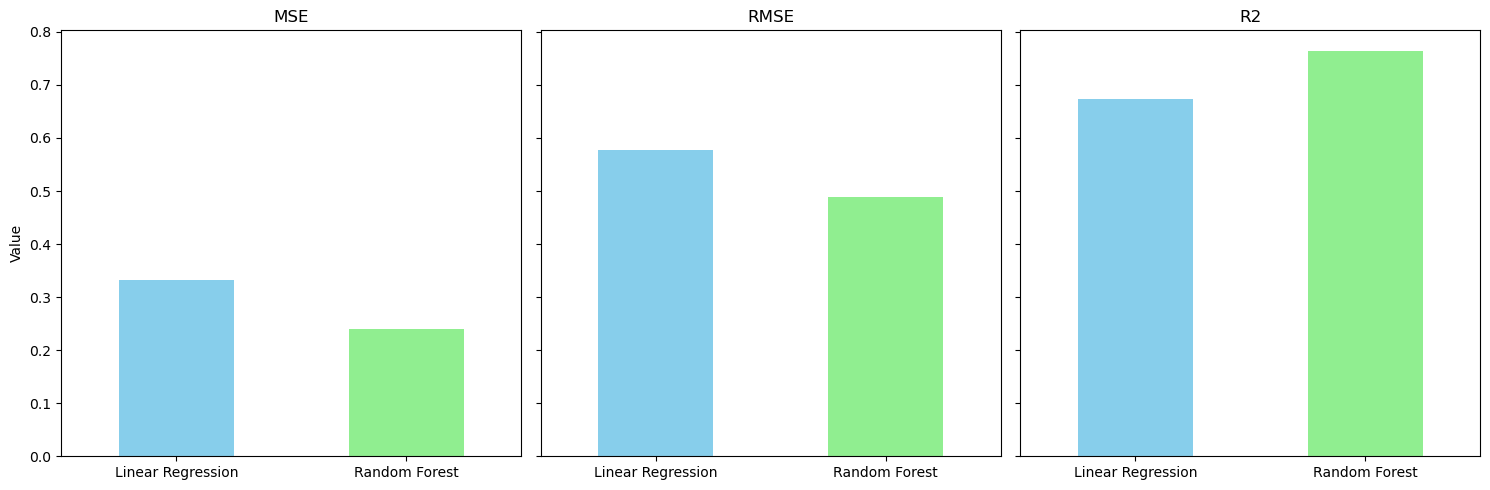

In [40]:
mse_lr = 0.332201
rmse_lr = 0.576368
r2_lr = 0.673722
mse_rf = 0.239665
rmse_rf = 0.489556
r2_rf = 0.764608

# Creating the DataFrame with the metrics
model_comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R2'],
    'Linear Regression': [mse_lr, rmse_lr, r2_lr],
    'Random Forest': [mse_rf, rmse_rf, r2_rf]
})

# Set Metric as the index
model_comparison.set_index('Metric', inplace=True)

# We'll create a bar chart for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Plotting each metric in a subplot
for i, metric in enumerate(model_comparison.index):
    model_comparison.loc[metric].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightgreen'])
    axes[i].set_title(metric)
    axes[i].set_ylabel('Value')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

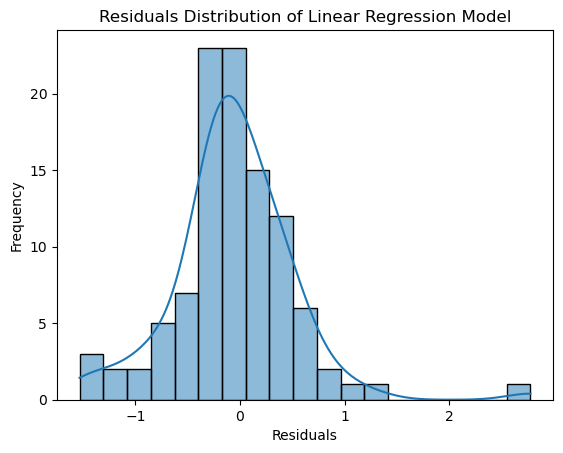

In [32]:
# Residuals for Linear Regression
residuals_lr = y_test - y_pred_lr

# Plotting residuals
sns.histplot(residuals_lr, kde=True)
plt.title('Residuals Distribution of Linear Regression Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

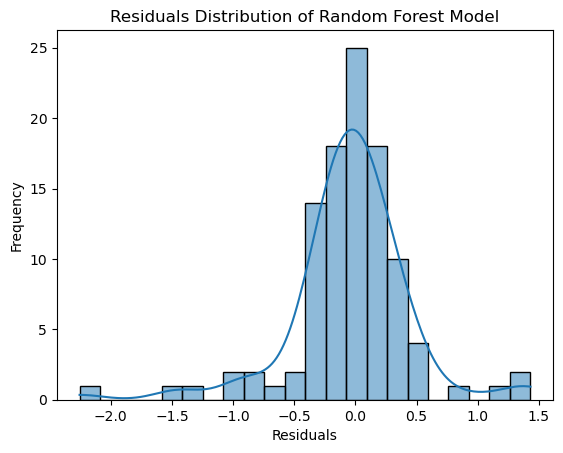

In [33]:
# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

# Plotting residuals
sns.histplot(residuals_rf, kde=True)
plt.title('Residuals Distribution of Random Forest Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

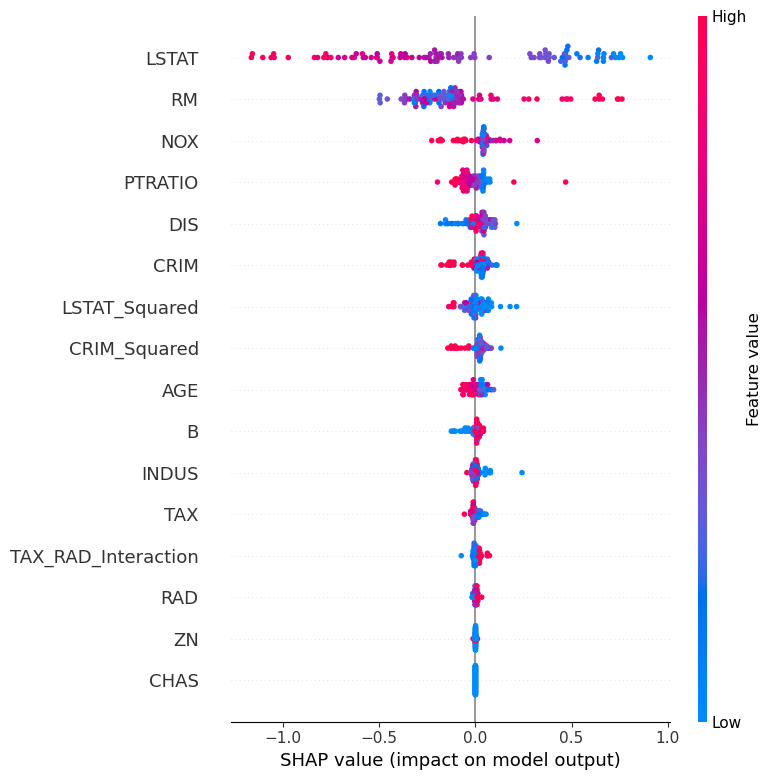

In [34]:
# Initialize SHAP Explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plotting SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)